In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [5]:
train.shape

(22083, 45)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

In [8]:
train.isnull().sum()

Patient Id                                             0
Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Family Name                                         9691
Father's name                                          0
Mother's age                                        6036
Father's age                                        5986
Institute Name                                      5106
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Test 1                         

In [9]:
train.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'S

In [112]:
numerical_features = [ f for f in train.columns if train[f].dtypes != 'O']

In [113]:
numerical_features

['Patient Age',
 'Blood cell count (mcL)',
 "Mother's age",
 "Father's age",
 'No. of previous abortion',
 'White Blood cell count (thousand per microliter)',
 'Symptom 1',
 'Symptom 2',
 'Symptom 3',
 'Symptom 4',
 'Symptom 5']

In [129]:
categorical_features = [ f for f in train.columns if train[f].dtypes == 'O']

In [130]:
categorical_features

["Genes in mother's side",
 'Inherited from father',
 'Maternal gene',
 'Paternal gene',
 'Status',
 'Respiratory Rate (breaths/min)',
 'Heart Rate (rates/min',
 'Parental consent',
 'Follow-up',
 'Gender',
 'Birth asphyxia',
 'Autopsy shows birth defect (if applicable)',
 'Place of birth',
 'Folic acid details (peri-conceptional)',
 'H/O serious maternal illness',
 'H/O radiation exposure (x-ray)',
 'H/O substance abuse',
 'Assisted conception IVF/ART',
 'History of anomalies in previous pregnancies',
 'Birth defects',
 'Blood test result',
 'Genetic Disorder',
 'Disorder Subclass']

In [17]:
train[numerical_features].isnull().sum()

Patient Age                                         1427
Blood cell count (mcL)                                 0
Mother's age                                        6036
Father's age                                        5986
Test 1                                              2127
Test 2                                              2152
Test 3                                              2147
Test 4                                              2140
Test 5                                              2170
No. of previous abortion                            2162
White Blood cell count (thousand per microliter)    2148
Symptom 1                                           2155
Symptom 2                                           2222
Symptom 3                                           2101
Symptom 4                                           2113
Symptom 5                                           2153
dtype: int64

In [18]:
train[numerical_features].head()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,2.0,4.760603,NaN,NaN,0.0,NaN,NaN,1.0,0.0,NaN,9.857562,1.0,1.0,1.0,1.0,1.0
1,4.0,4.910669,NaN,23.0,NaN,0.0,0.0,1.0,0.0,NaN,5.522560,1.0,NaN,1.0,1.0,0.0
2,6.0,4.893297,41.0,22.0,0.0,0.0,0.0,1.0,0.0,4.0,NaN,0.0,1.0,1.0,1.0,1.0
3,12.0,4.705280,21.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,7.919321,0.0,0.0,1.0,0.0,0.0
4,11.0,4.720703,32.0,NaN,0.0,0.0,0.0,1.0,0.0,4.0,4.098210,0.0,0.0,0.0,0.0,NaN


In [19]:
train[numerical_features].shape

(22083, 16)

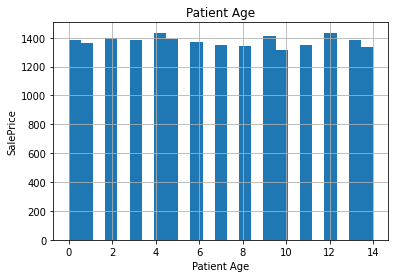

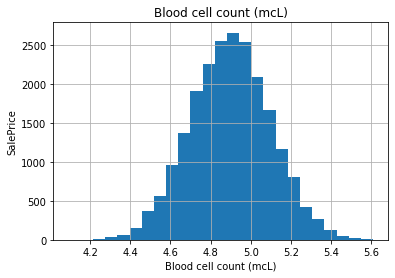

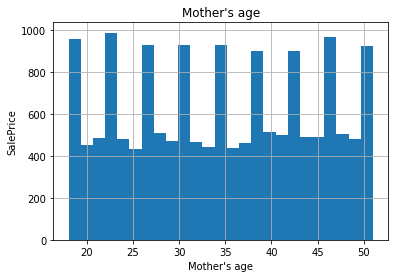

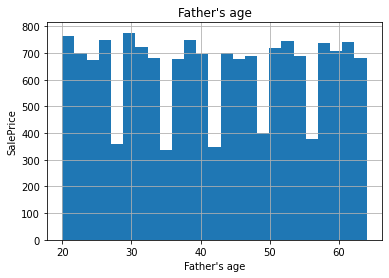

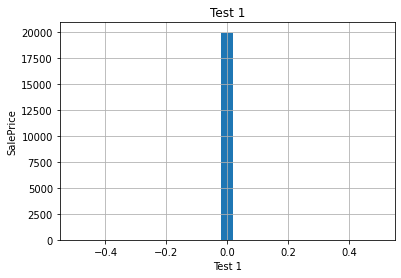

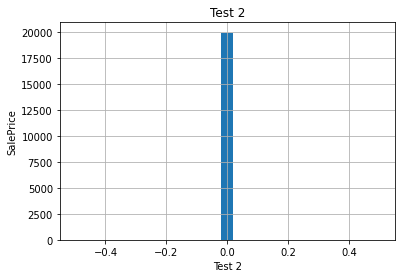

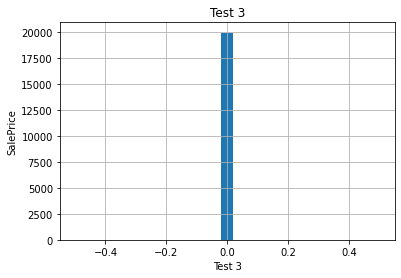

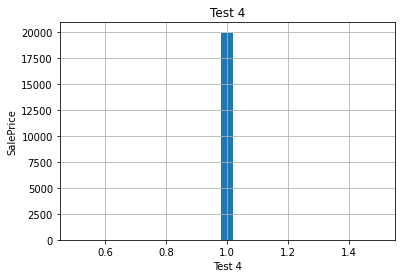

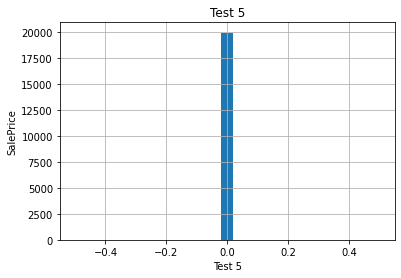

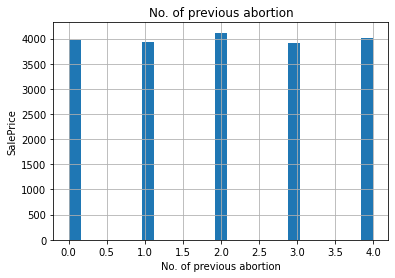

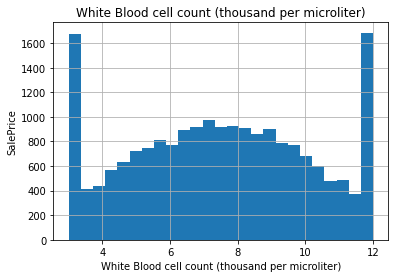

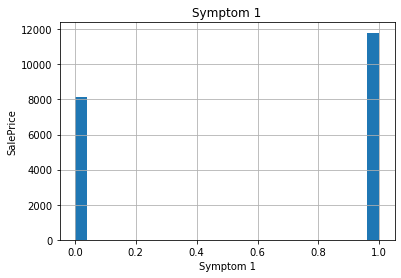

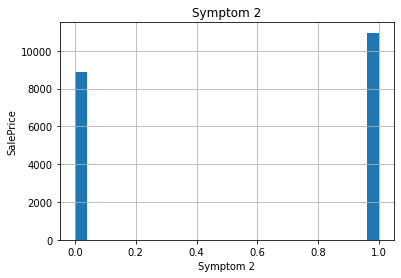

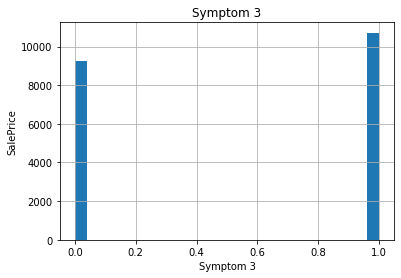

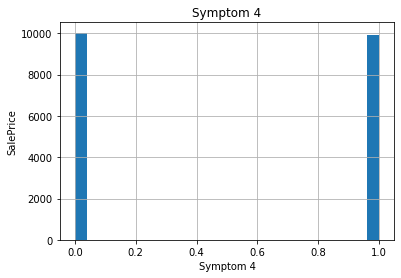

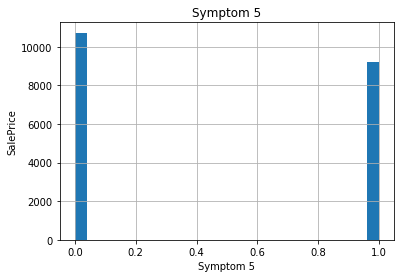

In [22]:
for feature in numerical_features:
    data=train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [24]:
train[categorical_features].head()

,Patient Id,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Patient First Name,Family Name,Father's name,Institute Name,Location of Institute,...,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Birth defects,Blood test result,Genetic Disorder,Disorder Subclass
0,PID0x6418,Yes,No,Yes,No,Richard,NaN,Larre,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",...,No,NaN,No,No,No,Yes,NaN,NaN,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,Yes,Yes,No,No,Mike,NaN,Brycen,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",...,Yes,Yes,Not applicable,Not applicable,No,Yes,Multiple,normal,NaN,Cystic fibrosis
2,PID0x4a82,Yes,No,No,No,Kimberly,NaN,Nashon,NaN,-,...,Yes,No,Yes,NaN,Yes,Yes,Singular,normal,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,Yes,No,Yes,No,Jeffery,Hoelscher,Aayaan,NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",...,No,Yes,-,Not applicable,NaN,Yes,Singular,inconclusive,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,Yes,No,NaN,Yes,Johanna,Stutzman,Suave,Carney Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",...,No,Yes,-,Not applicable,Yes,No,Multiple,NaN,Multifactorial genetic inheritance disorders,Cancer


In [26]:
categorical_features

['Patient Id',
 "Genes in mother's side",
 'Inherited from father',
 'Maternal gene',
 'Paternal gene',
 'Patient First Name',
 'Family Name',
 "Father's name",
 'Institute Name',
 'Location of Institute',
 'Status',
 'Respiratory Rate (breaths/min)',
 'Heart Rate (rates/min',
 'Parental consent',
 'Follow-up',
 'Gender',
 'Birth asphyxia',
 'Autopsy shows birth defect (if applicable)',
 'Place of birth',
 'Folic acid details (peri-conceptional)',
 'H/O serious maternal illness',
 'H/O radiation exposure (x-ray)',
 'H/O substance abuse',
 'Assisted conception IVF/ART',
 'History of anomalies in previous pregnancies',
 'Birth defects',
 'Blood test result',
 'Genetic Disorder',
 'Disorder Subclass']

In [27]:
train['Genetic Disorder'].value_counts()

Mitochondrial genetic inheritance disorders     10202
Single-gene inheritance diseases                 7664
Multifactorial genetic inheritance disorders     2071
Name: Genetic Disorder, dtype: int64

In [28]:
train['Disorder Subclass'].value_counts()

Leigh syndrome                         5160
Mitochondrial myopathy                 4405
Cystic fibrosis                        3448
Tay-Sachs                              2833
Diabetes                               1817
Hemochromatosis                        1355
Leber's hereditary optic neuropathy     648
Alzheimer's                             152
Cancer                                   97
Name: Disorder Subclass, dtype: int64

In [30]:
train['Genetic Disorder'].isnull().sum()

2146

In [31]:
train['Disorder Subclass'].isnull().sum()

2168

In [49]:
train.shape

(22083, 45)

In [50]:
import seaborn as sns

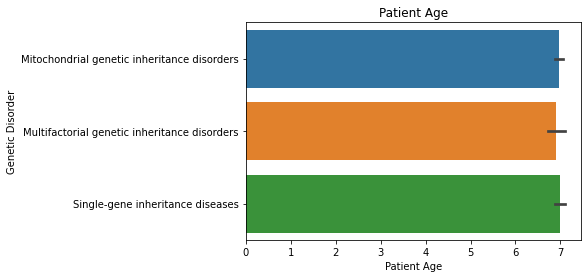

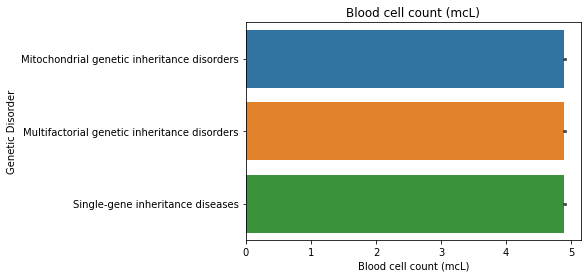

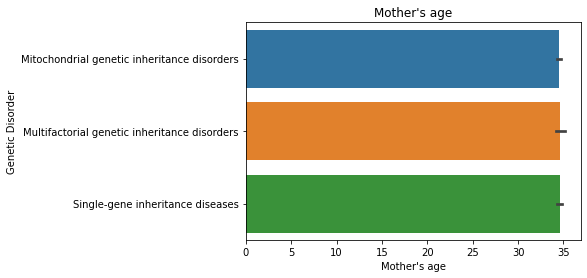

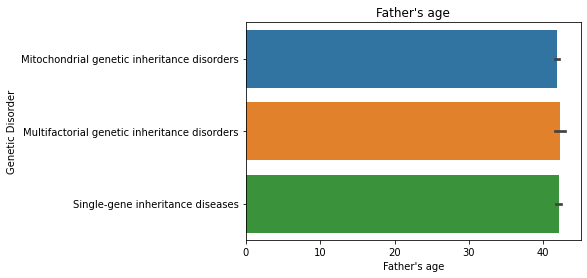

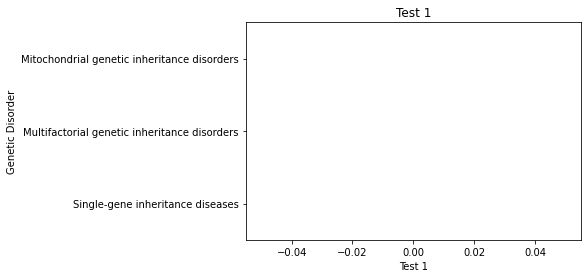

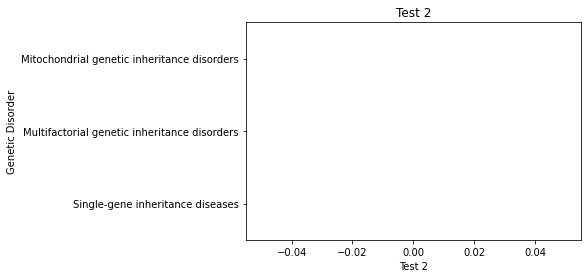

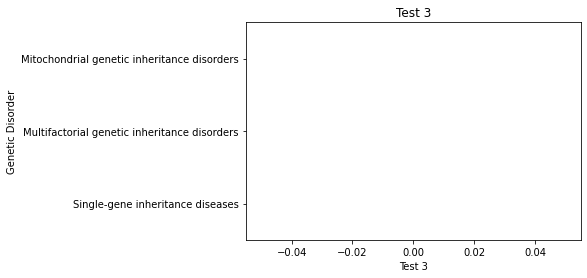

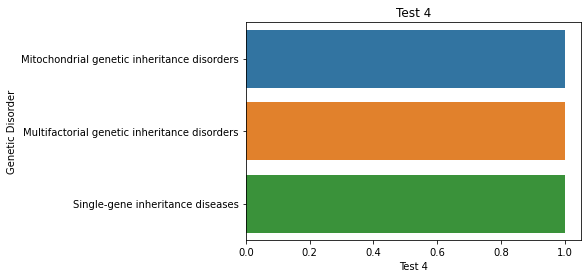

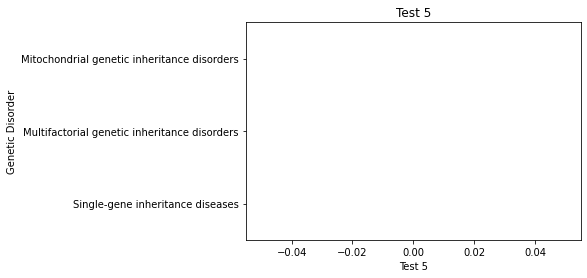

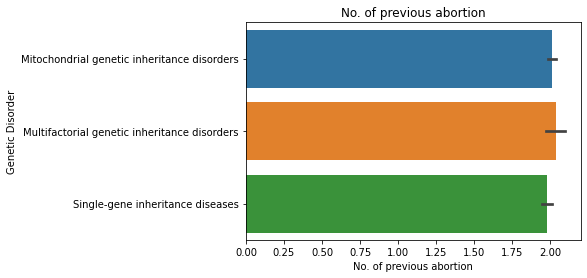

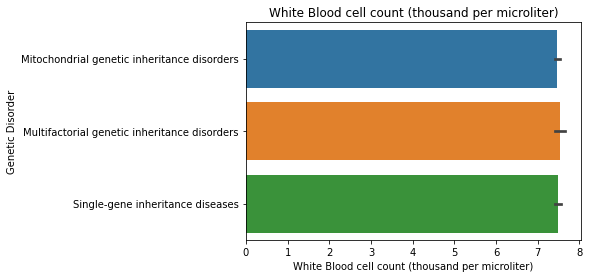

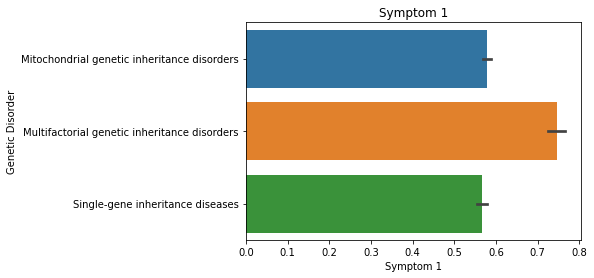

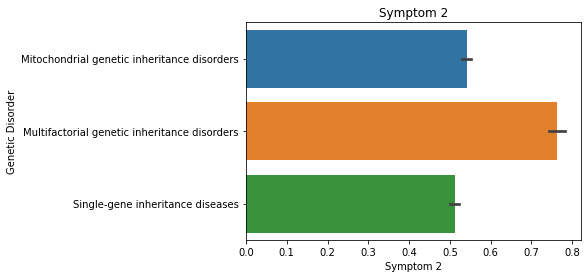

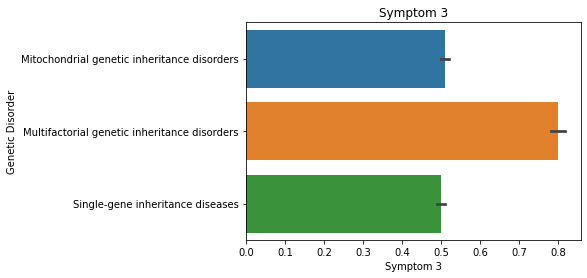

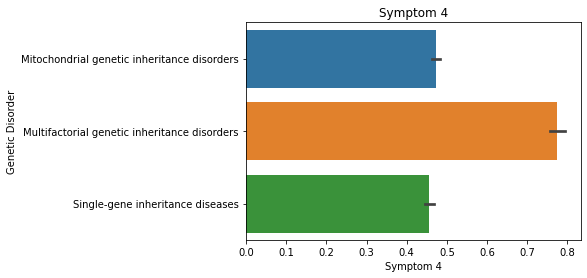

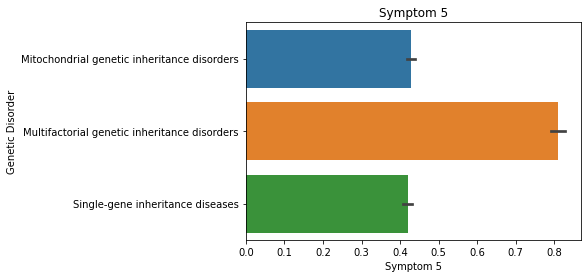

In [66]:
for feature in numerical_features:
    data1=train.copy()
    ax  = sns.barplot(x=feature,y= 'Genetic Disorder',data = data1)
    plt.xlabel(feature)
    plt.ylabel('Genetic Disorder')
    plt.title(feature)
    plt.show()

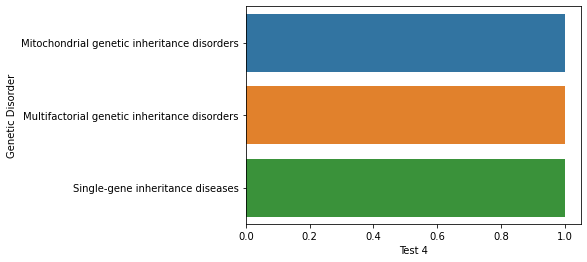

In [75]:
ax = sns.barplot(x='Test 4',y= 'Genetic Disorder',data = train)

In [69]:
train['Test 1'].value_counts()

0.0    19956
Name: Test 1, dtype: int64

In [70]:
train['Test 2'].value_counts()

0.0    19931
Name: Test 2, dtype: int64

In [71]:
train['Test 3'].value_counts()

0.0    19936
Name: Test 3, dtype: int64

In [72]:
train['Test 4'].value_counts()

1.0    19943
Name: Test 4, dtype: int64

In [73]:
train['Test 5'].value_counts()

0.0    19913
Name: Test 5, dtype: int64

###################### Note : Test1 to 5 columns can be dropped since it is having same values in the columns 

In [76]:
numerical_features

['Patient Age',
 'Blood cell count (mcL)',
 "Mother's age",
 "Father's age",
 'Test 1',
 'Test 2',
 'Test 3',
 'Test 4',
 'Test 5',
 'No. of previous abortion',
 'White Blood cell count (thousand per microliter)',
 'Symptom 1',
 'Symptom 2',
 'Symptom 3',
 'Symptom 4',
 'Symptom 5']

In [77]:
train['Patient Age'].value_counts()

4.0     1435
12.0    1435
9.0     1415
2.0     1396
5.0     1394
0.0     1386
13.0    1384
3.0     1383
6.0     1374
1.0     1364
11.0    1353
7.0     1351
8.0     1340
14.0    1333
10.0    1313
Name: Patient Age, dtype: int64

In [86]:
train["No. of previous abortion"].value_counts().sort_index()

0.0    3964
1.0    3928
2.0    4117
3.0    3907
4.0    4005
Name: No. of previous abortion, dtype: int64

In [88]:
train["Symptom 1"].value_counts().sort_index()

0.0     8121
1.0    11807
Name: Symptom 1, dtype: int64

In [92]:
train["Symptom 2"].value_counts().sort_index()

0.0     8900
1.0    10961
Name: Symptom 2, dtype: int64

In [90]:
train["Symptom 3"].value_counts().sort_index()

0.0     9267
1.0    10715
Name: Symptom 3, dtype: int64

In [91]:
train["Symptom 4"].value_counts().sort_index()

0.0    10030
1.0     9940
Name: Symptom 4, dtype: int64

In [93]:
train["Symptom 5"].value_counts().sort_index()

0.0    10724
1.0     9206
Name: Symptom 5, dtype: int64

In [110]:

train.drop(['Test 1','Test 2' ,'Test 3','Test 4','Test 5'],axis=1,inplace=True)

In [123]:
train['Patient Age'].fillna(train['Patient Age'].mode()[0],inplace = True)
train["Mother's age"].fillna(train["Mother's age"].mode()[0],inplace = True)
train["Father's age"].fillna(train["Father's age"].mode()[0],inplace = True)
train['No. of previous abortion'].fillna(train['No. of previous abortion'].mode()[0],inplace = True)
train['Symptom 1'].fillna(train['Symptom 1'].mode()[0],inplace = True)
train['Symptom 2'].fillna(train['Symptom 2'].mode()[0],inplace = True)
train['Symptom 3'].fillna(train['Symptom 3'].mode()[0],inplace = True)
train['Symptom 4'].fillna(train['Symptom 4'].mode()[0],inplace = True)
train['Symptom 5'].fillna(train['Symptom 5'].mode()[0],inplace = True)
train['White Blood cell count (thousand per microliter)'].fillna(train['White Blood cell count (thousand per microliter)'].mode()[0],inplace = True)

In [124]:
train[numerical_features].isnull().sum()

Patient Age                                         0
Blood cell count (mcL)                              0
Mother's age                                        0
Father's age                                        0
No. of previous abortion                            0
White Blood cell count (thousand per microliter)    0
Symptom 1                                           0
Symptom 2                                           0
Symptom 3                                           0
Symptom 4                                           0
Symptom 5                                           0
dtype: int64

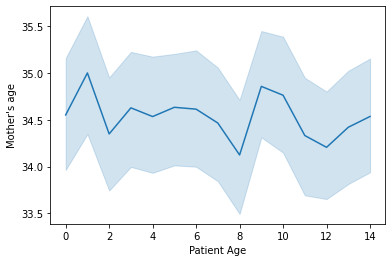

In [104]:
ax = sns.lineplot(x="Patient Age", y= "Mother's age",data = train)

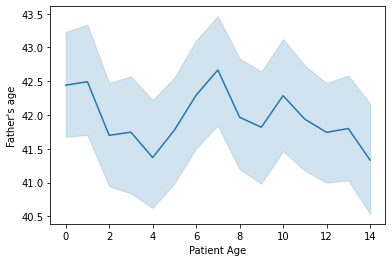

In [105]:
ax = sns.lineplot(x="Patient Age", y= "Father's age",data = train)

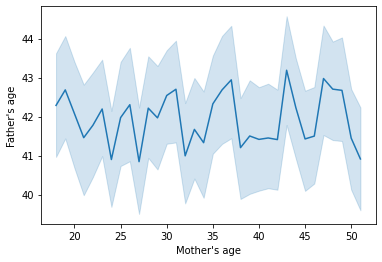

In [106]:
ax = sns.lineplot(x="Mother's age", y= "Father's age",data = train)

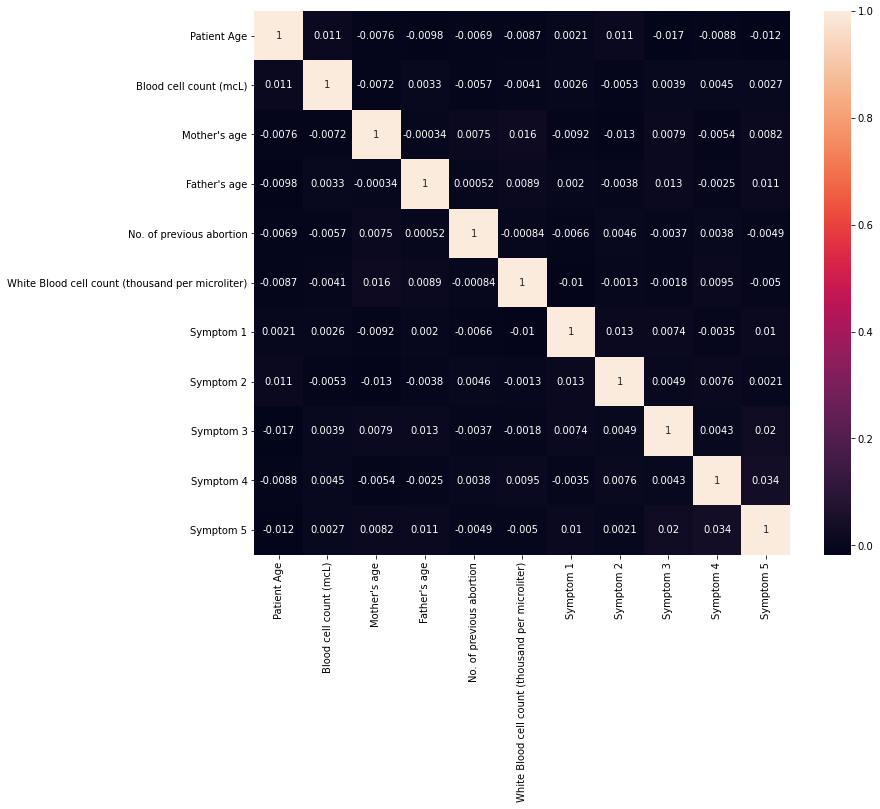

In [116]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(train[numerical_features].corr(),annot=True)

In [126]:
train['Genetic Disorder'].isnull().sum()

2146

In [127]:
categorical_features ################# name variables can be dropped

['Patient Id',
 "Genes in mother's side",
 'Inherited from father',
 'Maternal gene',
 'Paternal gene',
 'Patient First Name',
 'Family Name',
 "Father's name",
 'Institute Name',
 'Location of Institute',
 'Status',
 'Respiratory Rate (breaths/min)',
 'Heart Rate (rates/min',
 'Parental consent',
 'Follow-up',
 'Gender',
 'Birth asphyxia',
 'Autopsy shows birth defect (if applicable)',
 'Place of birth',
 'Folic acid details (peri-conceptional)',
 'H/O serious maternal illness',
 'H/O radiation exposure (x-ray)',
 'H/O substance abuse',
 'Assisted conception IVF/ART',
 'History of anomalies in previous pregnancies',
 'Birth defects',
 'Blood test result',
 'Genetic Disorder',
 'Disorder Subclass']

In [128]:
train.drop(['Patient Id','Patient First Name' ,'Family Name',"Father's name",'Institute Name','Location of Institute'],axis=1,inplace=True)

In [131]:
categorical_features

["Genes in mother's side",
 'Inherited from father',
 'Maternal gene',
 'Paternal gene',
 'Status',
 'Respiratory Rate (breaths/min)',
 'Heart Rate (rates/min',
 'Parental consent',
 'Follow-up',
 'Gender',
 'Birth asphyxia',
 'Autopsy shows birth defect (if applicable)',
 'Place of birth',
 'Folic acid details (peri-conceptional)',
 'H/O serious maternal illness',
 'H/O radiation exposure (x-ray)',
 'H/O substance abuse',
 'Assisted conception IVF/ART',
 'History of anomalies in previous pregnancies',
 'Birth defects',
 'Blood test result',
 'Genetic Disorder',
 'Disorder Subclass']

In [132]:
train[categorical_features].isnull().sum()

Genes in mother's side                             0
Inherited from father                            306
Maternal gene                                   2810
Paternal gene                                      0
Status                                             0
Respiratory Rate (breaths/min)                  2149
Heart Rate (rates/min                           2113
Parental consent                                2125
Follow-up                                       2166
Gender                                          2173
Birth asphyxia                                  2139
Autopsy shows birth defect (if applicable)      1026
Place of birth                                  2124
Folic acid details (peri-conceptional)          2117
H/O serious maternal illness                    2152
H/O radiation exposure (x-ray)                  2153
H/O substance abuse                             2195
Assisted conception IVF/ART                     2122
History of anomalies in previous pregnancies  

In [135]:
train.shape

(22083, 34)

In [228]:
train.dropna(axis=0, subset=['Disorder Subclass','Genetic Disorder'])
train['Inherited from father'].fillna(train['Inherited from father'].mode()[0],inplace = True)
train['Maternal gene'].fillna(train['Maternal gene'].mode()[0],inplace = True)
train['Respiratory Rate (breaths/min)'].fillna(train['Respiratory Rate (breaths/min)'].mode()[0],inplace = True)
train['Heart Rate (rates/min'].fillna(train['Heart Rate (rates/min'].mode()[0],inplace = True)
train['Follow-up'].fillna(train['Follow-up'].mode()[0],inplace = True)
train['Gender'].fillna(train['Gender'].mode()[0],inplace = True)
train['Place of birth'].fillna(train['Place of birth'].mode()[0],inplace = True)
train['Folic acid details (peri-conceptional)'].fillna(train['Folic acid details (peri-conceptional)'].mode()[0],inplace = True)
train['H/O serious maternal illness'].fillna(train['H/O serious maternal illness'].mode()[0],inplace = True)
train['Assisted conception IVF/ART'].fillna(train['Assisted conception IVF/ART'].mode()[0],inplace = True)
train['History of anomalies in previous pregnancies'].fillna(train['History of anomalies in previous pregnancies'].mode()[0],inplace = True)
train['Birth defects'].fillna(train['Birth defects'].mode()[0],inplace = True)
train['Blood test result'].fillna(train['Blood test result'].mode()[0],inplace = True)

train.drop(['Parental consent'],axis=1,inplace=True)
train['Birth asphyxia'] = train['Birth asphyxia'].replace(np.nan,'Not available')
train['Autopsy shows birth defect (if applicable)'] = train['Autopsy shows birth defect (if applicable)'].replace({np.nan:'Not applicable','None':'Not applicable'})
train['H/O radiation exposure (x-ray)'] = train['H/O radiation exposure (x-ray)'].replace({np.nan:'Not applicable','-':'Not applicable'})
train['H/O substance abuse'] = train['H/O substance abuse'].replace({np.nan:'Not applicable','-':'Not applicable'})

In [ ]:
### can drop parental consent 
### Birth asphyxia -- not availabel replace 
#### Replace Autopsy shows birth defect (if applicable) with None
### H/O radiation exposure (x-ray)  ----- Yes , No ,Not applicable  ['No', 'Not applicable', 'Yes', '-', nan] -- No
### H/O substance abuse  ---- Yes, No, Not applicable

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.drop(['Test 1','Test 2' ,'Test 3','Test 4','Test 5'],axis=1,inplace=True)
train['Patient Age'].fillna(train['Patient Age'].mode()[0],inplace = True)
train["Mother's age"].fillna(train["Mother's age"].mode()[0],inplace = True)
train["Father's age"].fillna(train["Father's age"].mode()[0],inplace = True)
train['No. of previous abortion'].fillna(train['No. of previous abortion'].mode()[0],inplace = True)
train['Symptom 1'].fillna(train['Symptom 1'].mode()[0],inplace = True)
train['Symptom 2'].fillna(train['Symptom 2'].mode()[0],inplace = True)
train['Symptom 3'].fillna(train['Symptom 3'].mode()[0],inplace = True)
train['Symptom 4'].fillna(train['Symptom 4'].mode()[0],inplace = True)
train['Symptom 5'].fillna(train['Symptom 5'].mode()[0],inplace = True)
train['White Blood cell count (thousand per microliter)'].fillna(train['White Blood cell count (thousand per microliter)'].mode()[0],inplace = True)

train.drop(['Patient Id','Patient First Name' ,'Family Name',"Father's name",'Institute Name','Location of Institute'],axis=1,inplace=True)

train.dropna(axis=0, subset=['Disorder Subclass','Genetic Disorder'],inplace=True)
train['Inherited from father'].fillna(train['Inherited from father'].mode()[0],inplace = True)
train['Maternal gene'].fillna(train['Maternal gene'].mode()[0],inplace = True)
train['Respiratory Rate (breaths/min)'].fillna(train['Respiratory Rate (breaths/min)'].mode()[0],inplace = True)
train['Heart Rate (rates/min'].fillna(train['Heart Rate (rates/min'].mode()[0],inplace = True)
train['Follow-up'].fillna(train['Follow-up'].mode()[0],inplace = True)
train['Gender'].fillna(train['Gender'].mode()[0],inplace = True)
train['Place of birth'].fillna(train['Place of birth'].mode()[0],inplace = True)
train['Folic acid details (peri-conceptional)'].fillna(train['Folic acid details (peri-conceptional)'].mode()[0],inplace = True)
train['H/O serious maternal illness'].fillna(train['H/O serious maternal illness'].mode()[0],inplace = True)
train['Assisted conception IVF/ART'].fillna(train['Assisted conception IVF/ART'].mode()[0],inplace = True)
train['History of anomalies in previous pregnancies'].fillna(train['History of anomalies in previous pregnancies'].mode()[0],inplace = True)
train['Birth defects'].fillna(train['Birth defects'].mode()[0],inplace = True)
train['Blood test result'].fillna(train['Blood test result'].mode()[0],inplace = True)

train.drop(['Parental consent'],axis=1,inplace=True)
train['Birth asphyxia'] = train['Birth asphyxia'].replace(np.nan,'Not available')
train['Autopsy shows birth defect (if applicable)'] = train['Autopsy shows birth defect (if applicable)'].replace({np.nan:'Not applicable','None':'Not applicable'})
train['H/O radiation exposure (x-ray)'] = train['H/O radiation exposure (x-ray)'].replace({np.nan:'Not applicable','-':'Not applicable'})
train['H/O substance abuse'] = train['H/O substance abuse'].replace({np.nan:'Not applicable','-':'Not applicable'})

In [230]:
train.isnull().sum()

Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood cell count (mcL)                              0
Mother's age                                        0
Father's age                                        0
Status                                              0
Respiratory Rate (breaths/min)                      0
Heart Rate (rates/min                               0
Follow-up                                           0
Gender                                              0
Birth asphyxia                                      0
Autopsy shows birth defect (if applicable)          0
Place of birth                                      0
Folic acid details (peri-conceptional)              0
H/O serious maternal illness                        0
H/O radiation exposure (x-ra

In [231]:
train.shape

(18047, 33)

In [232]:
train.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,23.0,20.0,Alive,Normal (30-60),...,Multiple,9.857562,slightly abnormal,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Singular,3.000000,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.0,20.0,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,Yes,Yes,4.720703,32.0,20.0,Alive,Tachypnea,...,Multiple,4.098210,slightly abnormal,0.0,0.0,0.0,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer
5,14.0,Yes,No,Yes,No,5.103188,23.0,20.0,Deceased,Normal (30-60),...,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis


In [234]:
train.to_csv('train_eda.csv')

In [4]:
train.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,23.0,20.0,Alive,Normal (30-60),...,Multiple,9.857562,slightly abnormal,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Singular,3.000000,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.0,20.0,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,Yes,Yes,4.720703,32.0,20.0,Alive,Tachypnea,...,Multiple,4.098210,slightly abnormal,0.0,0.0,0.0,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer
5,14.0,Yes,No,Yes,No,5.103188,23.0,20.0,Deceased,Normal (30-60),...,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis


In [20]:
train_independent = train.drop(['Genetic Disorder','Disorder Subclass'],axis=1)

In [21]:
train_independent = pd.get_dummies(train_independent,drop_first = True)

In [22]:
train_independent.head()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,...,H/O radiation exposure (x-ray)_Not applicable,H/O radiation exposure (x-ray)_Yes,H/O substance abuse_Not applicable,H/O substance abuse_Yes,Assisted conception IVF/ART_Yes,History of anomalies in previous pregnancies_Yes,Birth defects_Singular,Blood test result_inconclusive,Blood test result_normal,Blood test result_slightly abnormal
0,2.0,4.760603,23.0,20.0,2.0,9.857562,1.0,1.0,1.0,1.0,...,0,0,0,0,0,1,0,0,0,1
2,6.0,4.893297,41.0,22.0,4.0,3.000000,0.0,1.0,1.0,1.0,...,0,1,1,0,1,1,1,0,1,0
3,12.0,4.705280,21.0,20.0,1.0,7.919321,0.0,0.0,1.0,0.0,...,1,0,1,0,1,1,1,1,0,0
4,11.0,4.720703,32.0,20.0,4.0,4.098210,0.0,0.0,0.0,0.0,...,1,0,1,0,1,0,0,0,0,1
5,14.0,5.103188,23.0,20.0,0.0,10.272230,1.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,1,0


In [12]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [16]:
correlation(train_independent,0.6)

{'Autopsy shows birth defect (if applicable)_Not applicable',
 'Autopsy shows birth defect (if applicable)_Yes'}

In [42]:
X = train_independent
y = train['Genetic Disorder'].replace({'Mitochondrial genetic inheritance disorders':-1,'Multifactorial genetic inheritance disorders':0,'Single-gene inheritance diseases':1})


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

from sklearn.preprocessing import StandardScaler
sm = StandardScaler()
X_train_scaled = sm.fit_transform(X_train)
X_test_scaled = sm.transform(X_test)

from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train_scaled,y_train)
y_pred = lm.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred))


from sklearn.metrics import accuracy_score
print("accuracy is: " ,accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.54      0.94      0.68      2790
           0       0.48      0.31      0.38       549
           1       0.56      0.04      0.08      2076

    accuracy                           0.53      5415
   macro avg       0.52      0.43      0.38      5415
weighted avg       0.54      0.53      0.42      5415

[[2631   97   62]
 [ 371  171    7]
 [1897   91   88]]
accuracy is:  0.5337026777469991


In [44]:
from sklearn.tree import DecisionTreeClassifier
ex_decision = DecisionTreeClassifier()
ex_decision.fit(X_train_scaled,y_train)
y_pred = ex_decision.predict(X_test_scaled)
print(ex_decision.score(X_train_scaled,y_train))
                

print(metrics.confusion_matrix(y_test,y_pred))
                        

print(metrics.accuracy_score(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))

1.0
[[1560  234  996]
 [ 174  181  194]
 [ 945  230  901]]
0.48790397045244693
              precision    recall  f1-score   support

          -1       0.58      0.56      0.57      2790
           0       0.28      0.33      0.30       549
           1       0.43      0.43      0.43      2076

    accuracy                           0.49      5415
   macro avg       0.43      0.44      0.44      5415
weighted avg       0.49      0.49      0.49      5415



In [45]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train_scaled, y_train)
y_pred2 = model2.predict(X_test_scaled)
print(ex_decision.score(X_train_scaled,y_train))
                

print(metrics.confusion_matrix(y_test,y_pred2))
                        

print(metrics.accuracy_score(y_test,y_pred2))
print(metrics.classification_report(y_test, y_pred2))

1.0
[[2363   55  372]
 [ 276   97  176]
 [1387   45  644]]
0.5732225300092336
              precision    recall  f1-score   support

          -1       0.59      0.85      0.69      2790
           0       0.49      0.18      0.26       549
           1       0.54      0.31      0.39      2076

    accuracy                           0.57      5415
   macro avg       0.54      0.44      0.45      5415
weighted avg       0.56      0.57      0.53      5415



In [48]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=10)
model5.fit(X_train_scaled, y_train)
y_pred5 = model5.predict(X_test_scaled)
print(metrics.confusion_matrix(y_test,y_pred5))
print(metrics.accuracy_score(y_test,y_pred5))
print(metrics.classification_report(y_test, y_pred5))

[[2067  111  612]
 [ 186  168  195]
 [1154  117  805]]
0.5614035087719298
              precision    recall  f1-score   support

          -1       0.61      0.74      0.67      2790
           0       0.42      0.31      0.36       549
           1       0.50      0.39      0.44      2076

    accuracy                           0.56      5415
   macro avg       0.51      0.48      0.49      5415
weighted avg       0.55      0.56      0.55      5415



In [52]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.00538192, 0.00161327, 0.00298444, 0.        , 0.        ,
       0.        , 0.00582628, 0.00639795, 0.01366087, 0.01352593,
       0.0145163 , 0.        , 0.00199118, 0.00736653, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00159503,
       0.00148579, 0.00059659, 0.        , 0.00152631, 0.00200359,
       0.        , 0.        , 0.        , 0.00281727, 0.00493679,
       0.00296123, 0.00604428, 0.00157173, 0.00524636, 0.00880223,
       0.        , 0.00172519, 0.00322075, 0.00789535])

In [53]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Symptom 5                                                    0.014516
Symptom 3                                                    0.013661
Symptom 4                                                    0.013526
History of anomalies in previous pregnancies_Yes             0.008802
Blood test result_slightly abnormal                          0.007895
Maternal gene_Yes                                            0.007367
Symptom 2                                                    0.006398
H/O substance abuse_Not applicable                           0.006044
Symptom 1                                                    0.005826
Patient Age                                                  0.005382
Assisted conception IVF/ART_Yes                              0.005246
H/O radiation exposure (x-ray)_Not applicable                0.004937
Blood test result_normal                                     0.003221
Mother's age                                                 0.002984
H/O radiation exposu

<AxesSubplot:>

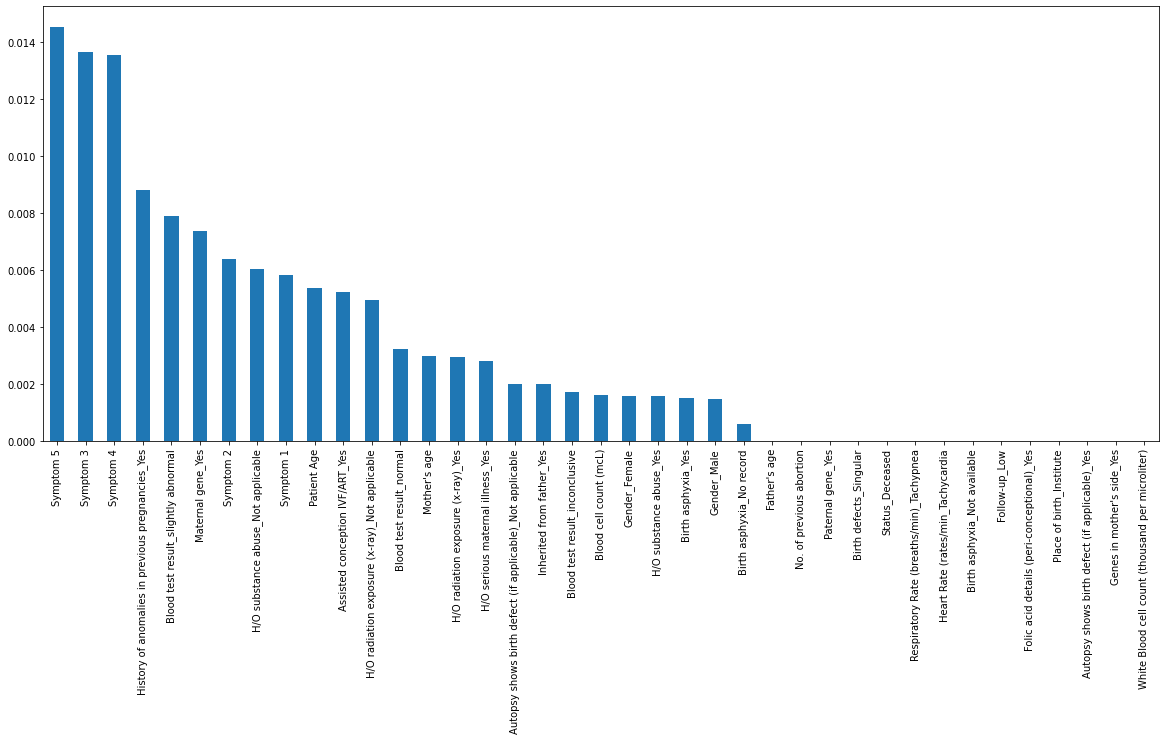

In [54]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [55]:
mutual_info.index

Index(['Patient Age', 'Blood cell count (mcL)', 'Mother's age', 'Father's age',
       'No. of previous abortion',
       'White Blood cell count (thousand per microliter)', 'Symptom 1',
       'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5',
       'Genes in mother's side_Yes', 'Inherited from father_Yes',
       'Maternal gene_Yes', 'Paternal gene_Yes', 'Status_Deceased',
       'Respiratory Rate (breaths/min)_Tachypnea',
       'Heart Rate (rates/min_Tachycardia', 'Follow-up_Low', 'Gender_Female',
       'Gender_Male', 'Birth asphyxia_No record',
       'Birth asphyxia_Not available', 'Birth asphyxia_Yes',
       'Autopsy shows birth defect (if applicable)_Not applicable',
       'Autopsy shows birth defect (if applicable)_Yes',
       'Place of birth_Institute',
       'Folic acid details (peri-conceptional)_Yes',
       'H/O serious maternal illness_Yes',
       'H/O radiation exposure (x-ray)_Not applicable',
       'H/O radiation exposure (x-ray)_Yes',
       'H/O substance a

In [67]:
list1 = []
def find(s, el):
    for i in s.index:
        if s[i] > el: 
            list1.append(i)
    return list1

print(find(mutual_info, 0))

['Patient Age', 'Blood cell count (mcL)', "Mother's age", 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5', 'Inherited from father_Yes', 'Maternal gene_Yes', 'Gender_Female', 'Gender_Male', 'Birth asphyxia_No record', 'Birth asphyxia_Yes', 'Autopsy shows birth defect (if applicable)_Not applicable', 'H/O serious maternal illness_Yes', 'H/O radiation exposure (x-ray)_Not applicable', 'H/O radiation exposure (x-ray)_Yes', 'H/O substance abuse_Not applicable', 'H/O substance abuse_Yes', 'Assisted conception IVF/ART_Yes', 'History of anomalies in previous pregnancies_Yes', 'Blood test result_inconclusive', 'Blood test result_normal', 'Blood test result_slightly abnormal']


In [69]:
len(list1)

25

In [71]:
for i in list1:
    print(i)

Patient Age
Blood cell count (mcL)
Mother's age
Symptom 1
Symptom 2
Symptom 3
Symptom 4
Symptom 5
Inherited from father_Yes
Maternal gene_Yes
Gender_Female
Gender_Male
Birth asphyxia_No record
Birth asphyxia_Yes
Autopsy shows birth defect (if applicable)_Not applicable
H/O serious maternal illness_Yes
H/O radiation exposure (x-ray)_Not applicable
H/O radiation exposure (x-ray)_Yes
H/O substance abuse_Not applicable
H/O substance abuse_Yes
Assisted conception IVF/ART_Yes
History of anomalies in previous pregnancies_Yes
Blood test result_inconclusive
Blood test result_normal
Blood test result_slightly abnormal


In [72]:
train_imp = train_independent[list1]

In [74]:
train_imp.head()

,Patient Age,Blood cell count (mcL),Mother's age,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Inherited from father_Yes,Maternal gene_Yes,...,H/O serious maternal illness_Yes,H/O radiation exposure (x-ray)_Not applicable,H/O radiation exposure (x-ray)_Yes,H/O substance abuse_Not applicable,H/O substance abuse_Yes,Assisted conception IVF/ART_Yes,History of anomalies in previous pregnancies_Yes,Blood test result_inconclusive,Blood test result_normal,Blood test result_slightly abnormal
0,2.0,4.760603,23.0,1.0,1.0,1.0,1.0,1.0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,6.0,4.893297,41.0,0.0,1.0,1.0,1.0,1.0,0,0,...,0,0,1,1,0,1,1,0,1,0
3,12.0,4.705280,21.0,0.0,0.0,1.0,0.0,0.0,0,1,...,1,1,0,1,0,1,1,1,0,0
4,11.0,4.720703,32.0,0.0,0.0,0.0,0.0,0.0,0,1,...,1,1,0,1,0,1,0,0,0,1
5,14.0,5.103188,23.0,1.0,0.0,0.0,1.0,0.0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [79]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Patient Age', 'Mother's age', 'Symptom 1', 'Symptom 2', 'Symptom 3',
       'Symptom 4', 'Symptom 5', 'Inherited from father_Yes',
       'Maternal gene_Yes', 'Birth asphyxia_Yes'],
      dtype='object')

In [81]:
X = train_independent[['Patient Age', "Mother's age", 'Symptom 1', 'Symptom 2', 'Symptom 3','Symptom 4', 'Symptom 5', 
                      'Inherited from father_Yes',
       'Maternal gene_Yes', 'Birth asphyxia_Yes']]
y = train['Genetic Disorder'].replace({'Mitochondrial genetic inheritance disorders':-1,'Multifactorial genetic inheritance disorders':0,'Single-gene inheritance diseases':1})


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

from sklearn.preprocessing import StandardScaler
sm = StandardScaler()
X_train_scaled = sm.fit_transform(X_train)
X_test_scaled = sm.transform(X_test)

from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train_scaled,y_train)
y_pred = lm.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred))


from sklearn.metrics import accuracy_score
print("accuracy is: " ,accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.53      0.97      0.69      2790
           0       0.49      0.26      0.34       549
           1       0.62      0.00      0.01      2076

    accuracy                           0.53      5415
   macro avg       0.55      0.41      0.34      5415
weighted avg       0.56      0.53      0.39      5415

[[2708   80    2]
 [ 403  142    4]
 [1997   69   10]]
accuracy is:  0.5281625115420129
